#LSTM and ARIMA with RSI (Relative Strength Index) Technical Indicator


**Authors:** Gabriel Sposito and Thomas Frentzel

**LSTM**


In [ ]:
!pip install ta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from ta.trend import CCIIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import PSARIndicator

In [ ]:
base = pd.read_csv('AMD 5Y.csv')
base.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$172.80,34730150,$171.75,$173.60,$170.00
1,10/07/2024,$170.97,38379930,$171.08,$172.41,$168.21
2,10/04/2024,$170.90,44640300,$166.533,$171.21,$164.42
3,10/03/2024,$162.85,29598790,$159.71,$166.7894,$159.40
4,10/02/2024,$159.78,24630430,$159.31,$163.10,$158.6689


In [ ]:
# Removing nule results
base.dropna()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$172.80,34730150,$171.75,$173.60,$170.00
1,10/07/2024,$170.97,38379930,$171.08,$172.41,$168.21
2,10/04/2024,$170.90,44640300,$166.533,$171.21,$164.42
3,10/03/2024,$162.85,29598790,$159.71,$166.7894,$159.40
4,10/02/2024,$159.78,24630430,$159.31,$163.10,$158.6689
...,...,...,...,...,...,...
1253,10/15/2019,$30.72,42142390,$30.70,$30.92,$30.17
1254,10/14/2019,$30.53,44818230,$29.71,$30.61,$29.38
1255,10/11/2019,$29.75,66632450,$28.83,$30.20,$28.81
1256,10/10/2019,$28.38,41172000,$28.52,$28.89,$28.00


In [ ]:
# Removing $
base['Close/Last'] = base['Close/Last'].str.replace('$', '')
base['Open'] = base['Open'].str.replace('$', '')
base['High'] = base['High'].str.replace('$', '')
base['Low'] = base['Low'].str.replace('$', '')

# Converting str to float
base['Close/Last'] = base['Close/Last'].astype(float)
base['Open'] = base['Open'].astype(float)
base['High'] = base['High'].astype(float)
base['Low'] = base['Low'].astype(float)

In [ ]:
cci = CCIIndicator(high=base['High'], low=base['Low'], close=base['Close/Last'], window=20, constant=0.015)
base['CCI'] = cci.cci()

sma_tp = base['High'] + base['Low'] + base['Close/Last'] / 3
sma_tp = sma_tp.rolling(window=20).mean()
mean_deviation = np.mean(np.abs(base['Close/Last'] - sma_tp))

rsi = RSIIndicator(close=base['Close/Last'], window=14)
base['RSI'] = rsi.rsi()

macd = MACD(close=base['Close/Last'], window_slow=26, window_fast=12, window_sign=9)
base['MACD'] = macd.macd()
base['MACD_Signal'] = macd.macd_signal()
base['MACD_Diff'] = macd.macd_diff()

psar = PSARIndicator(high=base['High'], low=base['Low'], close=base['Close/Last'])
base['Parabolic_SAR'] = psar.psar()

bollinger = BollingerBands(close=base['Close/Last'], window=20, window_dev=2)
base['Bollinger_High'] = bollinger.bollinger_hband()
base['Bollinger_Low'] = bollinger.bollinger_lband()
base['Bollinger_Middle'] = bollinger.bollinger_mavg()
base['Bollinger_Width'] = bollinger.bollinger_wband()

base.dropna()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,157.81,42791250,156.12,158.6500,155.07,128.490106,56.724050,-1.735664,-4.266283,2.530619,146.212562,159.538951,134.672049,147.1055,16.904128
34,08/20/2024,156.40,76851160,156.49,162.0400,154.51,120.837780,54.942210,-1.096467,-3.632320,2.535853,148.392952,160.585017,134.436983,147.5110,17.726158
35,08/19/2024,155.28,60766850,148.43,155.3650,147.72,60.194674,53.504486,-0.672520,-3.040360,2.367840,162.040000,161.173218,134.294782,147.7340,18.193805
36,08/16/2024,148.56,31123930,145.70,149.3693,145.20,2.305252,45.766121,-0.868773,-2.606043,1.737270,162.040000,160.856405,134.259595,147.5580,18.024648
37,08/15/2024,147.36,43582390,143.00,147.9600,141.81,-19.231609,44.527651,-1.108358,-2.306506,1.198148,161.366400,160.428964,134.192036,147.3105,17.810630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,10/15/2019,30.72,42142390,30.70,30.9200,30.17,-99.383285,24.075332,-2.154763,-2.139259,-0.015504,31.550800,37.639676,29.249324,33.4445,25.087388
1254,10/14/2019,30.53,44818230,29.71,30.6100,29.38,-105.536352,23.449722,-2.121456,-2.135699,0.014243,31.410000,37.317478,28.993522,33.1555,25.105806
1255,10/11/2019,29.75,66632450,28.83,30.2000,28.81,-117.461809,21.033342,-2.133407,-2.135240,0.001833,31.004000,36.981669,28.675331,32.8285,25.302215
1256,10/10/2019,28.38,41172000,28.52,28.8900,28.00,-148.813340,17.602422,-2.227746,-2.153741,-0.074004,30.610000,36.699642,28.167358,32.4335,26.307012


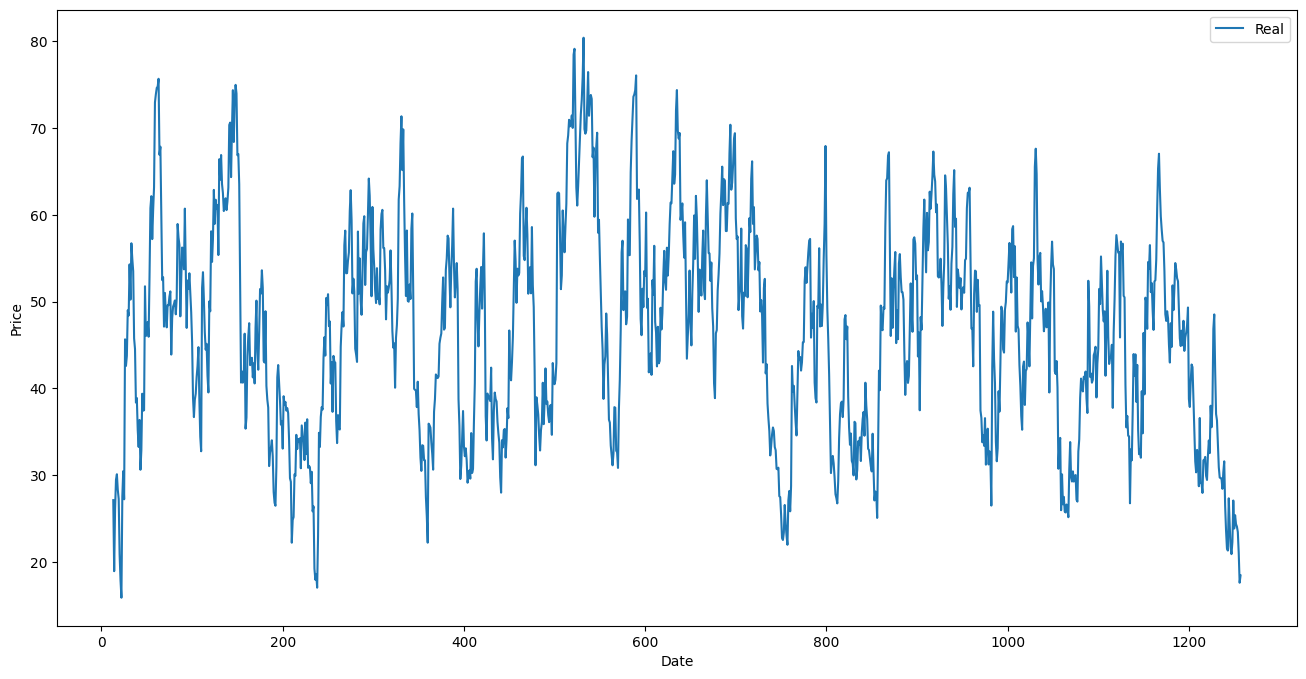

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['RSI'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

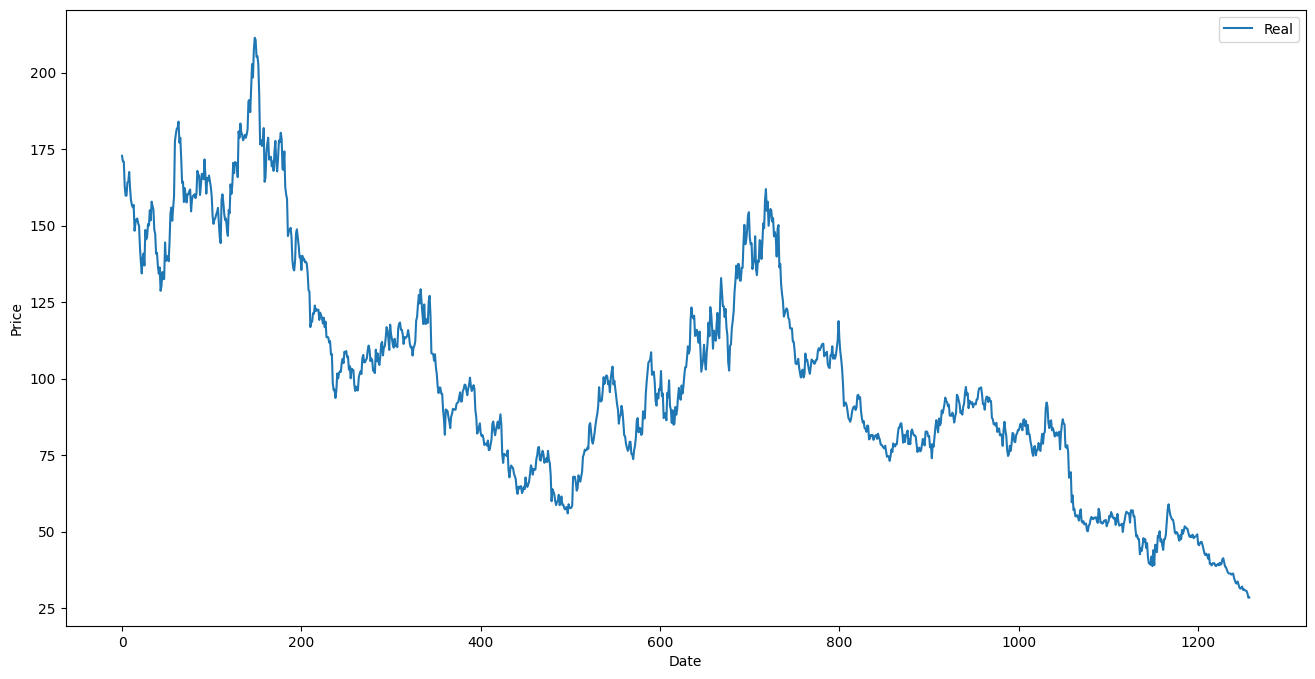

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['Close/Last'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base = base.replace([np.inf, -np.inf], np.nan)
base = base.dropna()

In [ ]:
# Normalizing the data of real values
scaler_real_value = MinMaxScaler(feature_range=(0, 1))
scaled_data_real_value = scaler_real_value.fit_transform(np.array(base['Close/Last']).reshape(-1, 1))

In [ ]:
window_size_real_value = 10
forecasters_real_value = []
real_value_of_prices = []
for i in range(window_size_real_value, len(base)):
    forecasters_real_value.append(scaled_data_real_value[i - window_size_real_value:i, 0])
    real_value_of_prices.append(scaled_data_real_value[i, 0])

forecasters_real_value, real_value_of_prices = np.array(forecasters_real_value), np.array(real_value_of_prices)
forecasters_real_value = np.reshape(forecasters_real_value, (forecasters_real_value.shape[0], forecasters_real_value.shape[1], 1))

In [ ]:
#dividindo a coluna close/last em 70% treino e 30% teste com trai_test_split
Xtrain_real_lstm, Xtest_real_lstm, ytrain_real_lstm, ytest_real_lstm = train_test_split(forecasters_real_value, real_value_of_prices,
                                                                                        test_size = 0.3, shuffle = False)

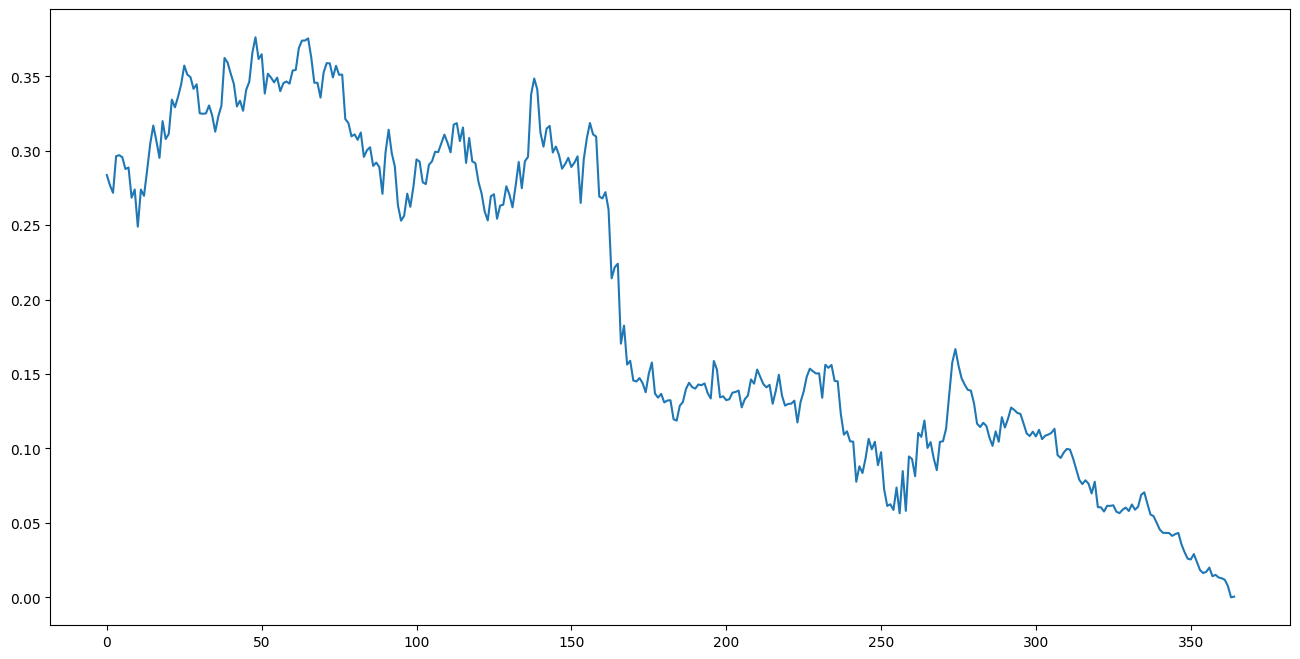

In [ ]:
#plotando grafico dos valores de teste
plt.figure(figsize=(16,8))
plt.plot(ytest_real_lstm)
plt.show()

In [ ]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(base['RSI']).reshape(-1, 1))

In [ ]:
window_size = 10
forecasters = []
real_value = []
for i in range(window_size, len(base)):
    forecasters.append(scaled_data[i - window_size:i, 0])
    real_value.append(scaled_data[i, 0])

forecasters, real_value = np.array(forecasters), np.array(real_value)
forecasters = np.reshape(forecasters, (forecasters.shape[0], forecasters.shape[1], 1))

In [ ]:
# Separating data between training and testing
X_train, X_test, y_train, y_test = train_test_split(forecasters, real_value, test_size=0.3, shuffle=False)

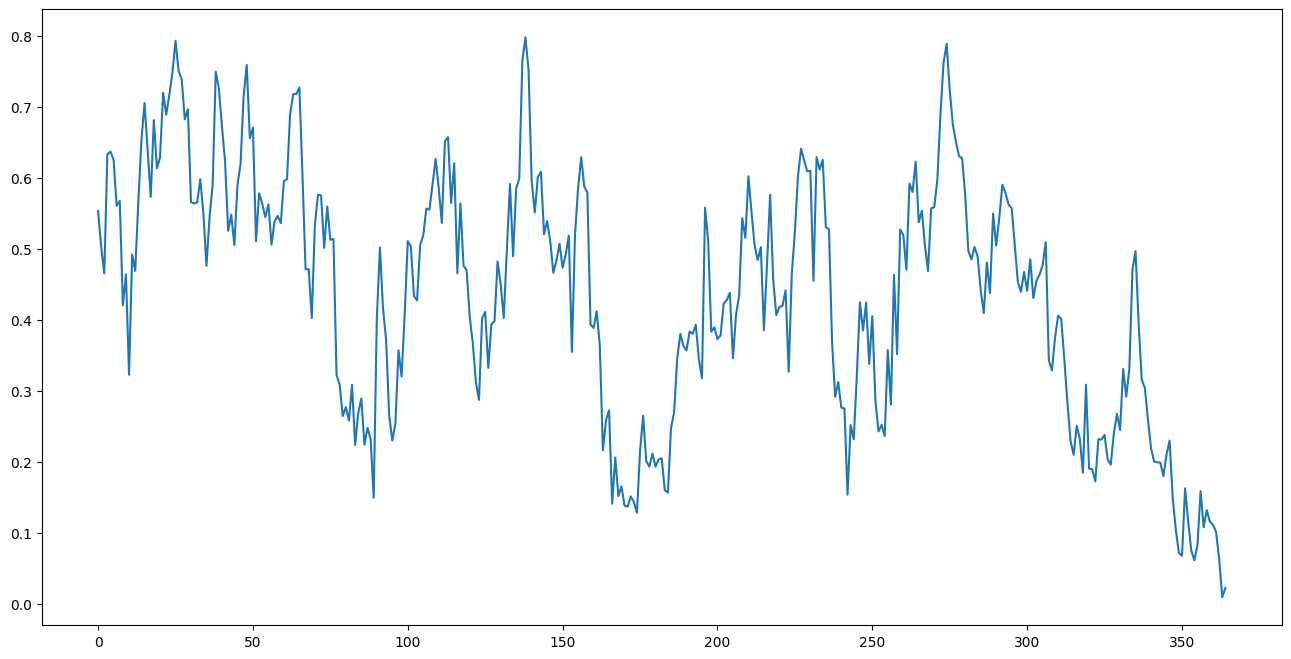

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(y_test)
plt.show()

In [ ]:
# LSTM model

lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(forecasters.shape[1], 1)))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.3))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.1151 - mean_absolute_error: 0.2748 - val_loss: 0.0166 - val_mean_absolute_error: 0.1071
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0259 - mean_absolute_error: 0.1314 - val_loss: 0.0160 - val_mean_absolute_error: 0.1051
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0275 - mean_absolute_error: 0.1347 - val_loss: 0.0152 - val_mean_absolute_error: 0.1033
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0239 - mean_absolute_error: 0.1265 - val_loss: 0.0152 - val_mean_absolute_error: 0.1035
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0224 - mean_absolute_error: 0.1215 - val_loss: 0.0147 - val_mean_absolute_error: 0.1017
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0230 - mean_absolute_error: 0.1236 - val_loss: 0.0153 - val_mean_absolute_error: 0.1037
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.1192 - v

In [ ]:
test_predictions = lstm.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [ ]:
# Transforming test values ​​back to original values
y_orig_test = scaler.inverse_transform(y_test.reshape(-1, 1))

#escalonando valores de teste
ytest_real_lstm = scaler_real_value.inverse_transform(ytest_real_lstm.reshape(-1, 1))

In [ ]:
test_predictions = test_predictions.ravel()
y_orig_test = y_orig_test.ravel()
ytest_real_lstm = ytest_real_lstm.ravel()

In [ ]:
test_size_L = len(y_test)

rsi_test = base['RSI'].tail(test_size_L)
close_test = base['Close/Last'].tail(test_size_L)

In [ ]:
# Inverse RSI formula
def inverse_rsi(predictions, close_prices, rsi_values, period=14):
    inverted_values = []

    for rsi, pred, close in zip(rsi_values, predictions, close_prices):
        # Calculates real RS from RSI
        rs_real = (100 - rsi) / rsi

        # Reverse predicted RSI to get RS (relative strength) estimate
        rs_pred = (100 - pred) / pred

        # Calculates the price change based on the difference between actual and forecast RS considering that RS = average gains / average losses
        gain = (rs_pred - rs_real) * close / (1 + rs_real)
        inverted_price = close + gain

        inverted_values.append(inverted_price)

    return np.array(inverted_values)

In [ ]:
# Inverting the values ​​test_predictions and y_orig_teste by the inverse RSI formula
test_predictions_inverted = inverse_rsi(test_predictions, close_test, rsi_test)
y_orig_test_inverted = inverse_rsi(y_orig_test, close_test, rsi_test)

min_length = min(len(ytest_real_lstm), len(test_predictions_inverted))
ytest_real_lstm = ytest_real_lstm[:min_length]
test_predictions_inverted = test_predictions_inverted[:min_length]

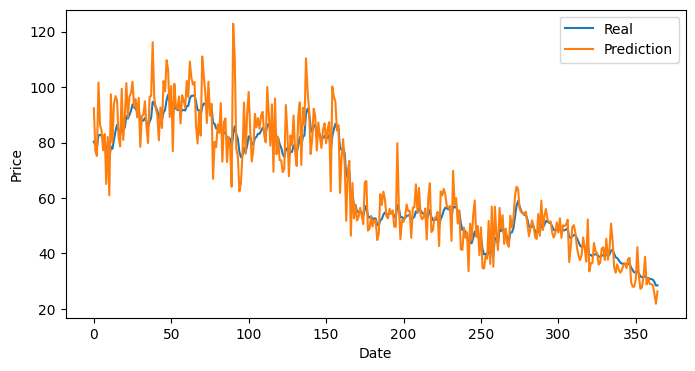

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(ytest_real_lstm)), ytest_real_lstm, label='Real')
plt.plot(range(len(test_predictions_inverted)), test_predictions_inverted, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# R2 Score
r2 = r2_score(y_orig_test_inverted, test_predictions_inverted)
print(f'R2 Score: {r2}')

# RMSE
rmse = np.sqrt(np.mean((y_orig_test_inverted - test_predictions_inverted) ** 2))
print(f'RMSE: {rmse}')

R2 Score: 0.8776953105543376
RMSE: 7.017051490254991


**ARIMA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from ta.trend import CCIIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import PSARIndicator
from math import sqrt

In [ ]:
base_A = pd.read_csv('AMD 5Y.csv')
base_A.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$172.80,34730150,$171.75,$173.60,$170.00
1,10/07/2024,$170.97,38379930,$171.08,$172.41,$168.21
2,10/04/2024,$170.90,44640300,$166.533,$171.21,$164.42
3,10/03/2024,$162.85,29598790,$159.71,$166.7894,$159.40
4,10/02/2024,$159.78,24630430,$159.31,$163.10,$158.6689


In [ ]:
base_A.dtypes

,0
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


In [ ]:
# Removing $
base_A['Close/Last'] = base_A['Close/Last'].str.replace('$', '')
base_A['Open'] = base_A['Open'].str.replace('$', '')
base_A['High'] = base_A['High'].str.replace('$', '')
base_A['Low'] = base_A['Low'].str.replace('$', '')

# Converting str to float
base_A['Close/Last'] = base_A['Close/Last'].astype(float)
base_A['Open'] = base_A['Open'].astype(float)
base_A['High'] = base_A['High'].astype(float)
base_A['Low'] = base_A['Low'].astype(float)

In [ ]:
cci = CCIIndicator(high=base_A['High'], low=base_A['Low'], close=base_A['Close/Last'], window=20, constant=0.015)
base_A['CCI'] = cci.cci()

sma_tp = base_A['High'] + base_A['Low'] + base_A['Close/Last'] / 3
sma_tp = sma_tp.rolling(window=20).mean()
mean_deviation = np.mean(np.abs(base_A['Close/Last'] - sma_tp))

rsi = RSIIndicator(close=base_A['Close/Last'], window=14)
base_A['RSI'] = rsi.rsi()

macd = MACD(close=base_A['Close/Last'], window_slow=26, window_fast=12, window_sign=9)
base_A['MACD'] = macd.macd()
base_A['MACD_Signal'] = macd.macd_signal()
base_A['MACD_Diff'] = macd.macd_diff()

psar = PSARIndicator(high=base_A['High'], low=base_A['Low'], close=base_A['Close/Last'])
base_A['Parabolic_SAR'] = psar.psar()

bollinger = BollingerBands(close=base_A['Close/Last'], window=20, window_dev=2)
base_A['Bollinger_High'] = bollinger.bollinger_hband()
base_A['Bollinger_Low'] = bollinger.bollinger_lband()
base_A['Bollinger_Middle'] = bollinger.bollinger_mavg()
base_A['Bollinger_Width'] = bollinger.bollinger_wband()

base_A.dropna()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,157.81,42791250,156.12,158.6500,155.07,128.490106,56.724050,-1.735664,-4.266283,2.530619,146.212562,159.538951,134.672049,147.1055,16.904128
34,08/20/2024,156.40,76851160,156.49,162.0400,154.51,120.837780,54.942210,-1.096467,-3.632320,2.535853,148.392952,160.585017,134.436983,147.5110,17.726158
35,08/19/2024,155.28,60766850,148.43,155.3650,147.72,60.194674,53.504486,-0.672520,-3.040360,2.367840,162.040000,161.173218,134.294782,147.7340,18.193805
36,08/16/2024,148.56,31123930,145.70,149.3693,145.20,2.305252,45.766121,-0.868773,-2.606043,1.737270,162.040000,160.856405,134.259595,147.5580,18.024648
37,08/15/2024,147.36,43582390,143.00,147.9600,141.81,-19.231609,44.527651,-1.108358,-2.306506,1.198148,161.366400,160.428964,134.192036,147.3105,17.810630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,10/15/2019,30.72,42142390,30.70,30.9200,30.17,-99.383285,24.075332,-2.154763,-2.139259,-0.015504,31.550800,37.639676,29.249324,33.4445,25.087388
1254,10/14/2019,30.53,44818230,29.71,30.6100,29.38,-105.536352,23.449722,-2.121456,-2.135699,0.014243,31.410000,37.317478,28.993522,33.1555,25.105806
1255,10/11/2019,29.75,66632450,28.83,30.2000,28.81,-117.461809,21.033342,-2.133407,-2.135240,0.001833,31.004000,36.981669,28.675331,32.8285,25.302215
1256,10/10/2019,28.38,41172000,28.52,28.8900,28.00,-148.813340,17.602422,-2.227746,-2.153741,-0.074004,30.610000,36.699642,28.167358,32.4335,26.307012


In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base_A = base_A.replace([np.inf, -np.inf], np.nan)
base_A = base_A.dropna()

In [ ]:
base_A.head()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,157.81,42791250,156.12,158.6500,155.07,128.490106,56.724050,-1.735664,-4.266283,2.530619,146.212562,159.538951,134.672049,147.1055,16.904128
34,08/20/2024,156.40,76851160,156.49,162.0400,154.51,120.837780,54.942210,-1.096467,-3.632320,2.535853,148.392952,160.585017,134.436983,147.5110,17.726158
35,08/19/2024,155.28,60766850,148.43,155.3650,147.72,60.194674,53.504486,-0.672520,-3.040360,2.367840,162.040000,161.173218,134.294782,147.7340,18.193805
36,08/16/2024,148.56,31123930,145.70,149.3693,145.20,2.305252,45.766121,-0.868773,-2.606043,1.737270,162.040000,160.856405,134.259595,147.5580,18.024648
37,08/15/2024,147.36,43582390,143.00,147.9600,141.81,-19.231609,44.527651,-1.108358,-2.306506,1.198148,161.366400,160.428964,134.192036,147.3105,17.810630


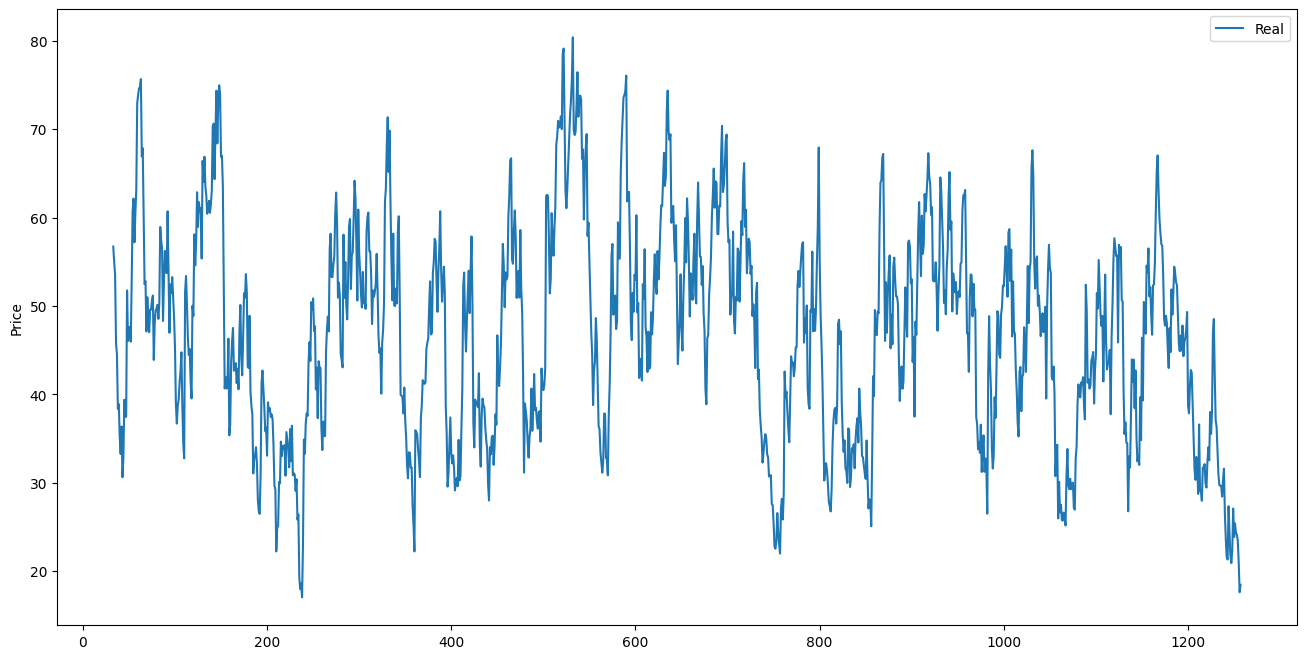

In [ ]:
#Plotting RSI
plt.figure(figsize=(16,8))
plt.plot(base_A['RSI'], label='Real')
plt.ylabel('Price')
plt.legend()

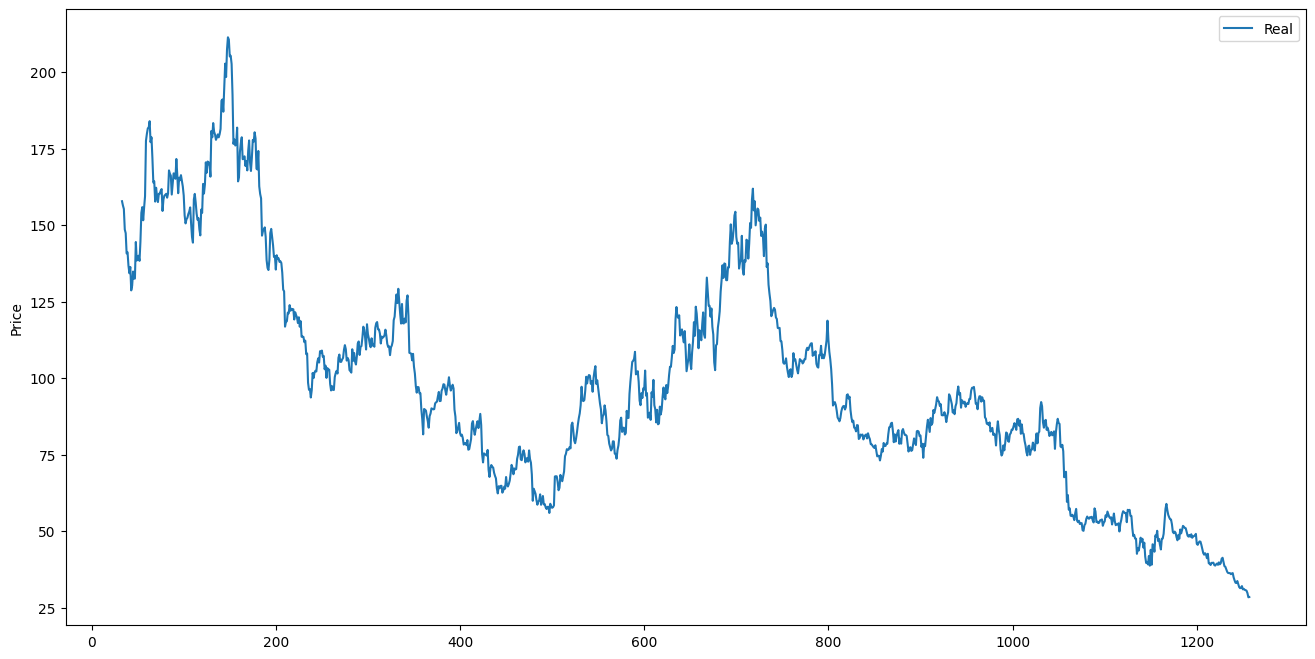

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base_A['Close/Last'], label='Real')
plt.ylabel('Price')
plt.legend()

In [ ]:
X_R = base_A['Close/Last'].values
size_R = int(len(X_R) * 0.70)
train_R, test_R = X_R[0:size_R], X_R[size_R:len(X_R)]
history_R = [x_r for x_r in train_R]
forecasts_R = list()

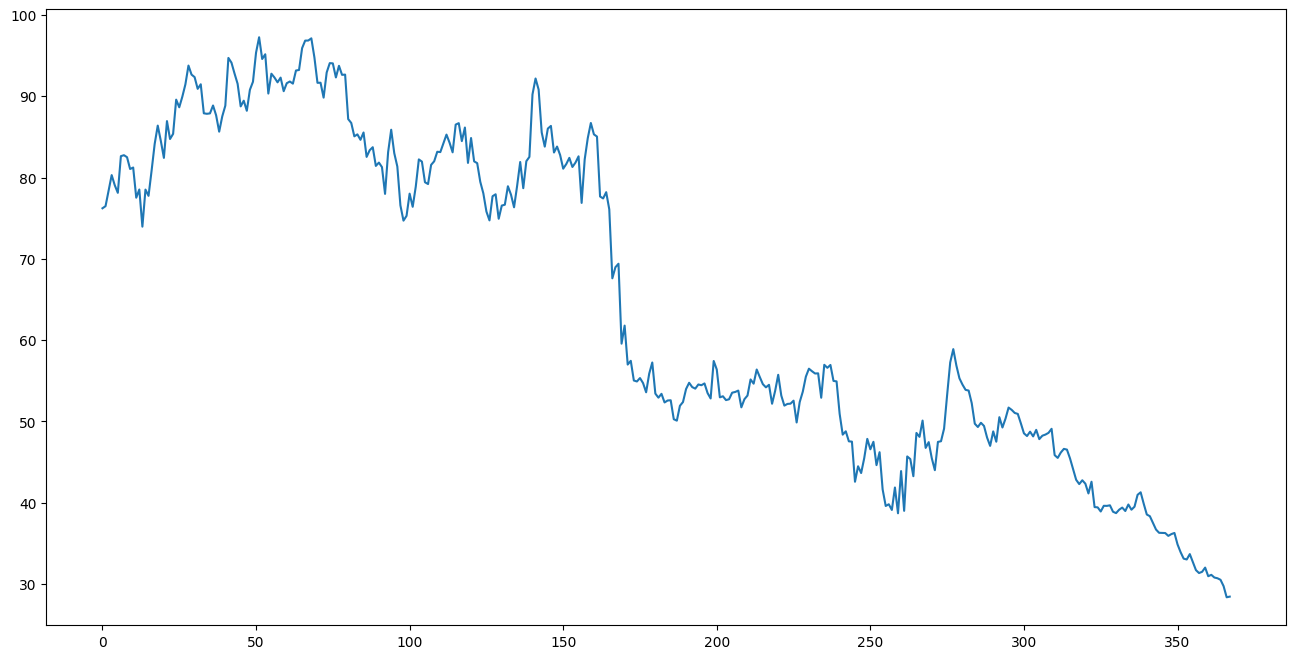

In [ ]:
#Test Grafic
plt.figure(figsize=(16, 8))
plt.plot(test_R)
plt.show()

In [ ]:
# Addfuller for RSI
result = adfuller(base_A['RSI'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -6.492190154855863
p-value: 1.218861952682377e-08


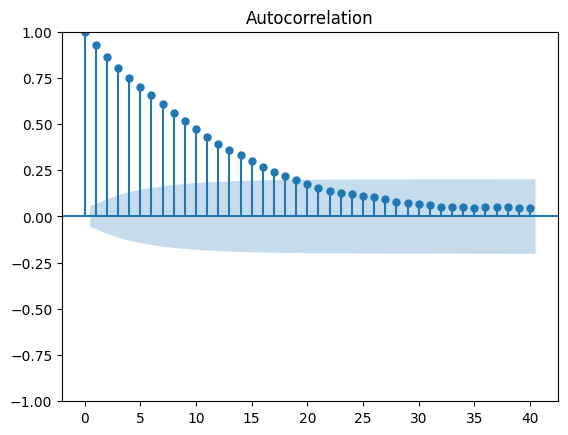

In [ ]:
plot_acf(base_A['RSI'], lags=40)
plt.show()

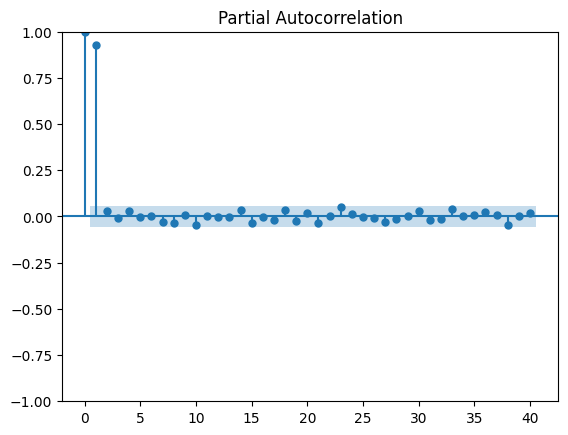

In [ ]:
plot_pacf(base_A['RSI'], lags=40)
plt.show()

In [ ]:
X = base_A['RSI'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
forecasts = list()

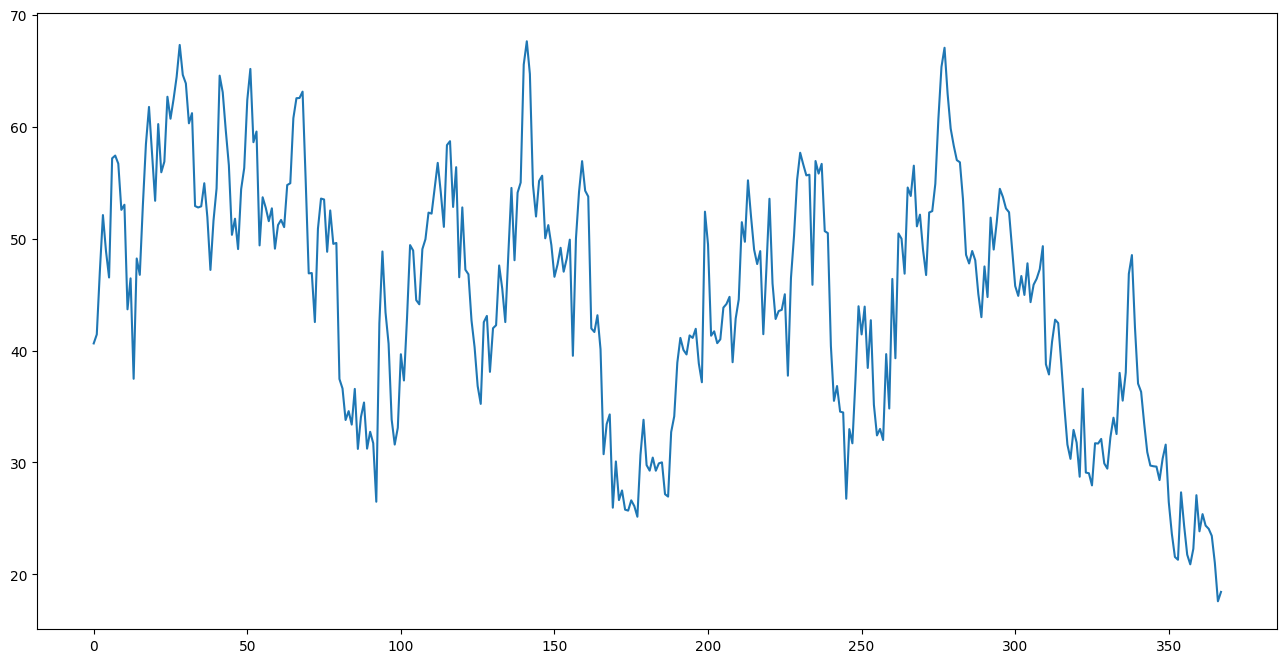

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test)
plt.show()

In [ ]:
# ARIMA
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    forecasts.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Expected={yhat}, Observed={obs}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Expected=43.462481572497964, Observed=40.63403929122394
Expected=41.11226684038815, Observed=41.438111500146086
Expected=41.85862798013026, Observed=47.079035384436956
Expected=47.12649158519679, Observed=52.100165652647256
Expected=51.827070335731854, Observed=48.87490510500336
Expected=48.81210735125029, Observed=46.52369854451959
Expected=46.6141505667433, Observed=57.16975545400582
Expected=56.54763060370125, Observed=57.41269430506688
Expected=56.78927346765248, Observed=56.69124493373017
Expected=56.11602753039217, Observed=52.56542043443186
Expected=52.262073842508066, Observed=53.022481277927994
Expected=52.68710532786115, Observed=43.68025797676486
Expected=43.969367187512475, Observed=46.44662130980889
Expected=46.540114061336574, Observed=37.4766869759989
Expected=38.19846852015458, Observed=48.221890624635975
Expected=48.11416167434454, Observed=46.76051284437837
Expected=46.85118260184884, Observed=52.961061579327925


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=52.56794996668856, Observed=58.44164349438158
Expected=57.70287506438598, Observed=61.757957260475564
Expected=60.82366215246043, Observed=57.63757912210666
Expected=57.02315442705548, Observed=53.374248212924286
Expected=53.03859170062811, Observed=60.226239442298734
Expected=59.36043566409451, Observed=55.91881341792199
Expected=55.429238972255, Observed=56.87010367192221
Expected=56.271597631783415, Observed=62.66796316627039
Expected=61.64681171428217, Observed=60.70573530772213
Expected=59.88576186909477, Observed=62.45654243673046
Expected=61.49032518506151, Observed=64.45098542133576
Expected=63.35729991952489, Observed=67.29453474632808
Expected=66.01753564201123, Observed=64.61971855213983
Expected=63.567856672625304, Observed=63.856337192370454
Expected=62.83766956674662, Observed=60.293217349050074
Expected=59.52982404224108, Observed=61.19992893547497
Expected=60.33807921944761, Observed=52.90576957678555
Expected=52.67423789735088, Observed=52.77631177991495
Expec

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=48.14657172419243, Observed=54.102148888091214
Expected=53.60257984517955, Observed=55.00146424493041
Expected=54.5107677885673, Observed=65.53860059425818


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=64.19409353825542, Observed=67.62236617190797


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=66.25561540084983, Observed=64.69901402918674
Expected=63.589826506318666, Observed=54.810887898905435
Expected=54.44366875093397, Observed=51.970452290406946
Expected=51.729305936733155, Observed=55.1460017543283
Expected=54.628058004011926, Observed=55.61577114175804
Expected=55.09089382648685, Observed=50.02479817833315
Expected=49.947894630008236, Observed=51.204120105074736
Expected=50.983100604794636, Observed=49.41503068065926
Expected=49.34844066278733, Observed=46.583508539104066
Expected=46.726494742071324, Observed=47.67894611287571
Expected=47.70831880002626, Observed=49.175555064596786
Expected=49.09536577556101, Observed=47.04010579398781
Expected=47.14467244006858, Observed=48.20789372334372
Expected=48.19891282842251, Observed=49.904183260425306
Expected=49.770240705458534, Observed=39.52890460004915
Expected=40.250863864523126, Observed=50.00070886370757
Expected=49.72078502185112, Observed=54.163156508217035
Expected=53.68869127208213, Observed=56.91586030812

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=26.732925188887915, Observed=30.6647908430824
Expected=31.782522309043337, Observed=33.81498354338902
Expected=34.753917864190576, Observed=29.763773945132
Expected=31.07382924478344, Observed=29.27011924928844
Expected=30.556919606911105, Observed=30.438056524249177
Expected=31.620287123650776, Observed=29.26437949686286
Expected=30.55428501616241, Observed=29.92324343453987
Expected=31.13886339462811, Observed=30.011000491781388
Expected=31.225178964671574, Observed=27.165580381808496
Expected=28.605550389349098, Observed=26.952975172603843
Expected=28.361925292202173, Observed=32.718194311680634
Expected=33.66016771414955, Observed=34.12560661108661


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=35.03566142655854, Observed=38.91218452753069
Expected=39.45302098593573, Observed=41.12917610640977
Expected=41.55549087849511, Observed=40.05171791995458
Expected=40.59581089101561, Observed=39.65070008326892
Expected=40.21168990474052, Observed=41.3482584358029
Expected=41.7647031122772, Observed=41.128395884463814
Expected=41.5855152794102, Observed=41.941091216104425
Expected=42.32772430757302, Observed=38.84376318375537
Expected=39.49543323715283, Observed=37.165481998850154


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=37.90973597673578, Observed=52.4035204633424
Expected=51.86270772082278, Observed=49.46133740877154
Expected=49.3898626319794, Observed=41.32320558705092
Expected=41.88852222313389, Observed=41.71577083583158


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=42.1267494548431, Observed=40.656719542599156
Expected=41.16183613624823, Observed=40.999926513207406
Expected=41.4544462339782, Observed=43.83348219566216
Expected=44.06079907702502, Observed=44.15441213919124
Expected=44.396432833069376, Observed=44.79605585231296
Expected=44.98874500926191, Observed=38.95523498235984
Expected=39.648081608150704, Observed=42.850726698366124
Expected=43.125571136414926, Observed=44.56505761144386


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=44.75571694015145, Observed=51.46403849351807
Expected=51.099399929070415, Observed=49.71417405163921
Expected=49.60061527775544, Observed=55.2030067813379
Expected=54.59561623438343, Observed=51.97277576500309
Expected=51.72921707670512, Observed=49.01811911424494
Expected=48.97386727187037, Observed=47.72324458249412
Expected=47.74283754125115, Observed=48.87922439727787
Expected=48.77963541148912, Observed=41.45867653783989
Expected=42.01329903665995, Observed=47.30117305080956
Expected=47.22521886356408, Observed=53.5565461922243
Expected=53.0464986204441, Observed=45.98584481667639
Expected=46.243072834495166, Observed=42.81628654768551
Expected=43.212368034627076, Observed=43.52619752910813
Expected=43.80622737273721, Observed=43.63385310564314
Expected=43.91701746204245, Observed=45.02577157029019
Expected=45.18963878925571, Observed=37.75349533008574
Expected=38.57663379345069, Observed=46.473240041996064
Expected=46.38565754809603, Observed=50.26925933527921
Expected=

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=49.87928508375439, Observed=49.98238605175658
Expected=49.82463664541047, Observed=46.864222235866116
Expected=47.01527880048345, Observed=54.56123675160312
Expected=53.80012622108576, Observed=53.803944233560046
Expected=53.38470276121222, Observed=56.512380009410705
Expected=55.78417880205062, Observed=51.0927810298334
Expected=51.02795552816521, Observed=52.13731923327761
Expected=51.77580809347479, Observed=48.99469847542411
Expected=49.00104837236694, Observed=46.74207753482599
Expected=46.87928838369273, Observed=52.32977428662614
Expected=51.794746778731835, Observed=52.453273631764034
Expected=52.10125656531066, Observed=54.89165022289967
Expected=54.2858352426554, Observed=60.71477061011293
Expected=59.582631260784815, Observed=65.33679087392812
Expected=63.93146794820046, Observed=67.04269132288611
Expected=65.6217743832918, Observed=62.92991404816199
Expected=61.984577605022245, Observed=59.82321480482055
Expected=59.06078061373386, Observed=58.29324622133314
Expect

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Expected=32.69751400381937, Observed=31.692637703151505
Expected=32.80394514980429, Observed=32.10360959975439
Expected=33.168598598357086, Observed=29.916037325480005
Expected=31.219912834132273, Observed=29.450971229592398
Expected=30.721845454418393, Observed=32.25308143699641
Expected=33.21275002695789, Observed=34.000682727744504
Expected=34.878199768369505, Observed=32.540402011097285
Expected=33.62936549055687, Observed=38.00237034626976
Expected=38.468165080945525, Observed=35.52434268208947
Expected=36.44437647176656, Observed=38.039787510821625
Expected=38.603043164495375, Observed=46.851248106196074
Expected=46.57874630086074, Observed=48.52512616693357
Expected=48.38748817918724, Observed=42.03977842950211
Expected=42.644424300894286, Observed=37.04784234608059
Expected=37.944152728305674, Observed=36.30916479013635
Expected=37.11250730237093, Observed=33.46879104378452
Expected=34.53990490768385, Observed=30.926195196748452
Expected=32.154524858881025, Observed=29.72525188

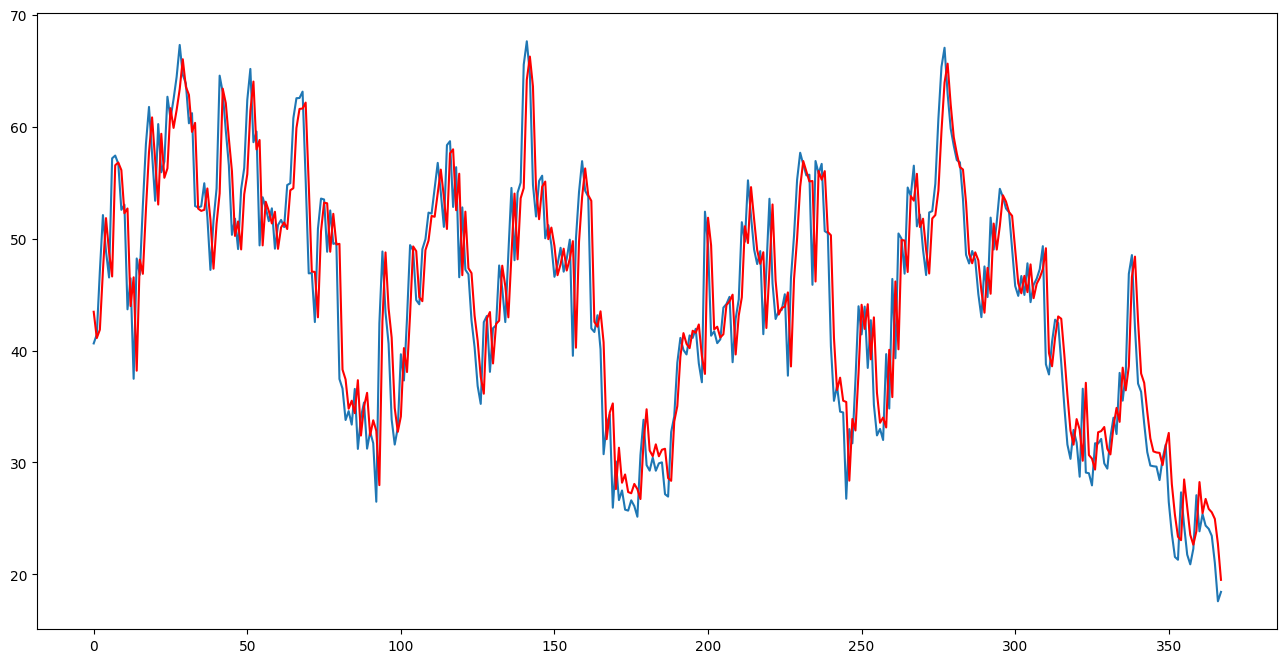

In [ ]:
# Test and forecast set
plt.figure(figsize=(16, 8))
plt.plot(test)
plt.plot(forecasts, color='red')
plt.show()

In [ ]:
# Ensuring that data is one-dimensional
test = test.ravel()
forecasts = np.array(forecasts).ravel()

In [ ]:
# Getting the high, low and close values ​​from the test set for the RSI
test_size_A = len(test)

rsi_test_A = base_A['RSI'].tail(test_size_A)
close_test_A = base_A['Close/Last'].tail(test_size_A)

In [ ]:
print(test.shape)
print(forecasts.shape)

(368,)
(368,)


In [ ]:
# Inverse RSI formula
def inverse_rsi_A(predictions_A, close_prices_A, rsi_values_A, period=14):
    inverted_values = []

    for rsi, pred, close in zip(rsi_values_A, predictions_A, close_prices_A):
        # Calculates real RS from RSI
        rs_real = (100 - rsi) / rsi

        # Reverse predicted RSI to get RS (relative strength) estimate
        rs_pred = (100 - pred) / pred

        # Calculates the price change based on the difference between actual and forecast RS considering that RS = average gains / average losses
        gain = (rs_pred - rs_real) * close / (1 + rs_real)
        inverted_price = close + gain

        inverted_values.append(inverted_price)

    return np.array(inverted_values)

In [ ]:
test_inverted = inverse_rsi_A(test, close_test_A, rsi_test_A)
forecasts_inverted = inverse_rsi_A(forecasts, close_test_A, rsi_test_A)

min_length_R = min(len(test_R), len(forecasts_inverted))
test_R = test_R[:min_length_R]
forecasts_inverted = forecasts_inverted[:min_length_R]

In [ ]:
# RMSE
rmse = sqrt(mean_squared_error(test_R, forecasts_inverted))
print(f'RMSE: {rmse}')

# R2 Score
r2 = r2_score(test_R, forecasts_inverted)
print(f'R2 Score: {r2}')

RMSE: 6.821051881050222
R2 Score: 0.8838608803674385


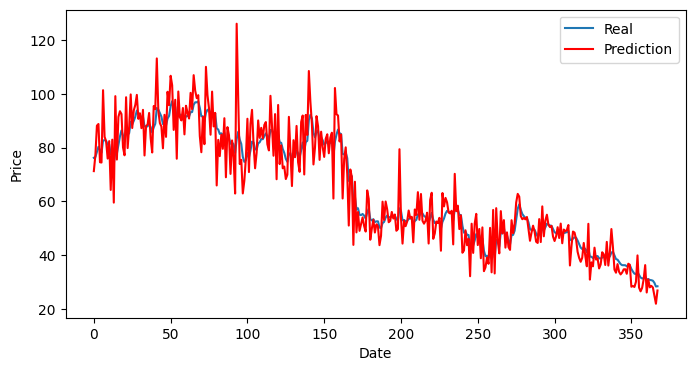

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(test_R)), test_R, label='Real')
plt.plot(range(len(forecasts_inverted)), forecasts_inverted, label='Prediction', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()